In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

#### 1.Data Preparation

In [36]:
data=pd.read_excel("heart disease.xlsx")
data.head()

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


#### 2.Exploratory Data Analysis(EDA)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


In [6]:
data.isnull()

,age,Age in years
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [7]:
data.isnull().sum()

age             0
Age in years    0
dtype: int64

In [8]:
data.shape

(12, 2)

In [9]:
data.head()

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [10]:
data.columns

Index(['age', 'Age in years'], dtype='object')

In [11]:
# Replace '?' with NaN (common in Adult dataset)
data = data.replace('?', np.nan)
print("\nMissing after replacing '?':\n", data.isnull().sum())




Missing after replacing '?':
 age             0
Age in years    0
dtype: int64


##### Visualization

In [12]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include='object').columns

In [13]:
# Encode categorical variables (if present)
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = LabelEncoder().fit_transform(data[col])

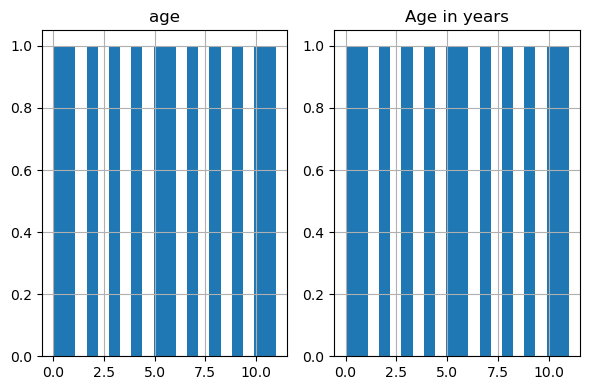

In [14]:
# Visualize distributions of numerical features
data.hist(figsize=(6,4), bins=20)

plt.tight_layout()
plt.show()

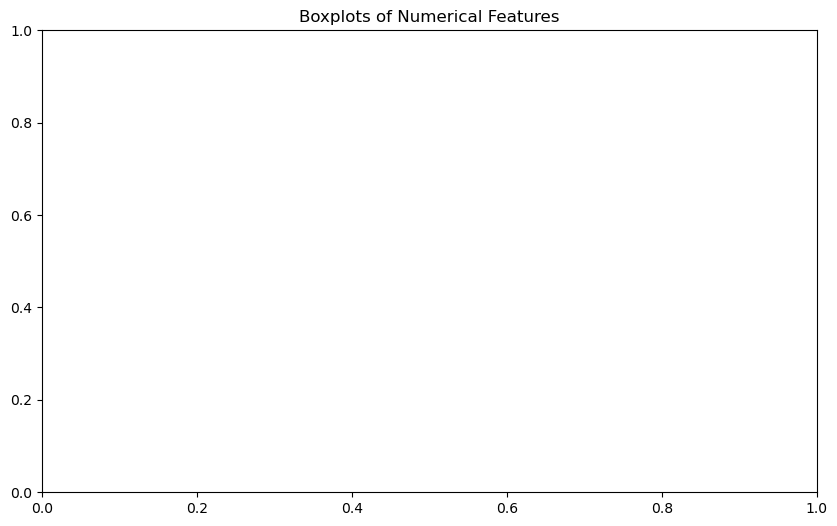

In [15]:
# Boxplots for outlier detection
plt.figure(figsize=(10,6))
sns.boxplot(data=data[num_cols])
plt.title("Boxplots of Numerical Features")
plt.show()

In [16]:
data.dtypes

age             int64
Age in years    int64
dtype: object

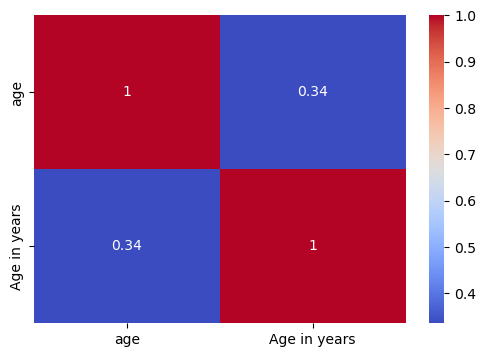

In [17]:
# Correlation heatmap
plt.figure(figsize=( 6,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

#### 3.Feature Engineering

In [18]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)


age             0
Age in years    0
dtype: int64


C:\Users\nikhi\AppData\Local\Temp\ipykernel_24404\281843279.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [19]:
 #Encode categorical variables
cat_cols = data.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [20]:
#scaling numerical features
from sklearn.preprocessing import StandardScaler

num_cols = ['age']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])


#### Decision Tree Classification

In [21]:
# Define features and target
X = data.drop('age', axis=1)
y = data['age']


In [22]:
# Split data into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9, 1), (3, 1), (9,), (3,))

In [23]:
print(y_train.unique())
print(y_train.dtype)


[ 0.14484136  0.43452409  1.59325501 -1.01388955 -0.14484136 -0.43452409
 -0.72420682 -1.30357228  1.30357228]
float64


##### Build and train the model

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [25]:
print("""the column has continuous numbers (like cholesterol level)

Then that’s not suitable for classification — it’s a regression target.""")

the column has continuous numbers (like cholesterol level)

Then that’s not suitable for classification — it’s a regression target.


In [26]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
# for the given data regression is possible classification is not applying

DecisionTreeRegressor(random_state=42)

In [27]:
y = (data['age'] > data['age'].median()).astype(int)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Predictions
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:, 1] if len(dt.classes_) == 2 else None


In [32]:
# Evaluate
print("\n=== Base Model Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
if y_prob is not None:
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


=== Base Model Performance ===
Accuracy: 0.6666666666666666
Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666
ROC-AUC: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



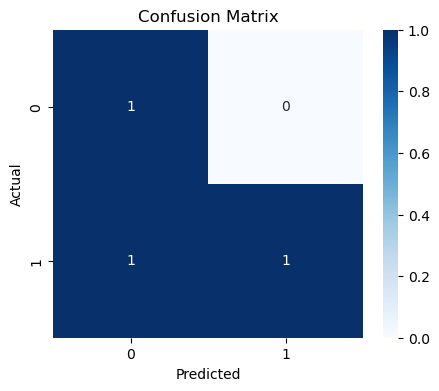

In [33]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 5. HYPERPARAMETER TUNING


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("\n✅ Best Parameters:", grid.best_params_)
best_dt = grid.best_estimator_

# Evaluate the tuned model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_best = best_dt.predict(X_test)
print("\n=== Tuned Model Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))


Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



✅ Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}

=== Tuned Model Performance ===
Accuracy: 0.6666666666666666
Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666


 #### 6. MODEL EVALUATION & ANALYSIS



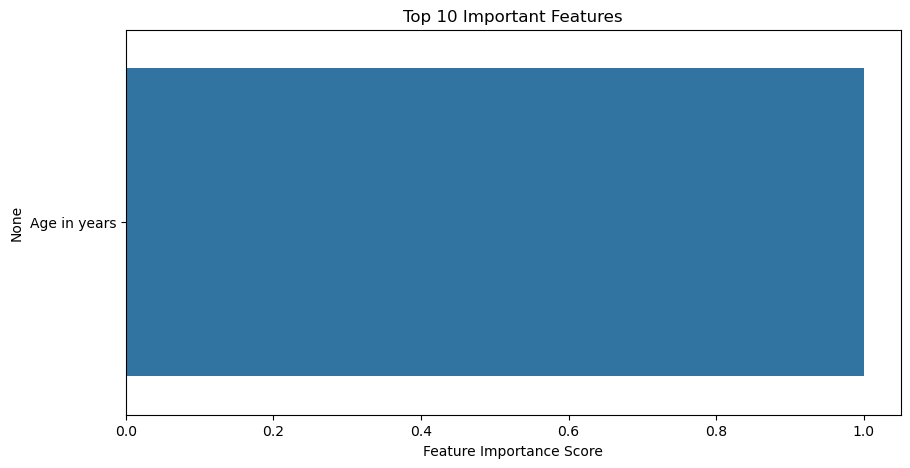

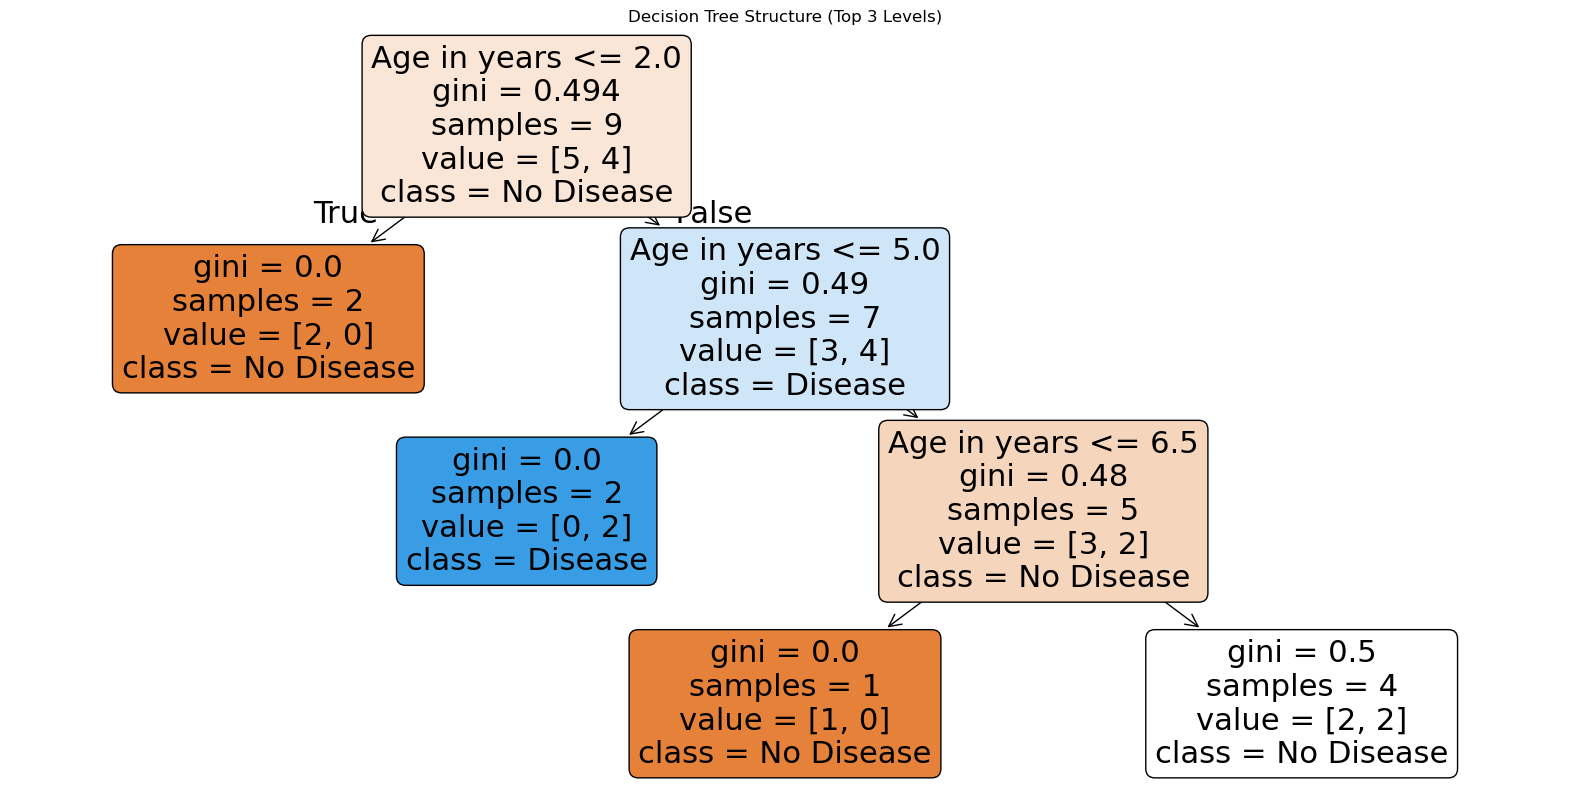


 Model Evaluation Completed Successfully!


In [35]:

# Feature importance
feat_imp = pd.Series(best_dt.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.show()

# Visualize Decision Tree (simplified for readability)
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=X.columns, class_names=['No Disease','Disease'], filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree Structure (Top 3 Levels)")
plt.show()

print("\n Model Evaluation Completed Successfully!")